In [14]:
%pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [15]:
import os, requests, sqlite3, pandas as pd
from bs4 import BeautifulSoup
from PIL import Image

os.makedirs("data", exist_ok=True)

print("\n================= 1. TITANIC CSV =================")

try:
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)
    df.to_csv("data/titanic.csv", index=False)
    print(df.head(), "\nSaved: data/titanic.csv")
except Exception as e:
    print("❌ CSV error:", e)


================= 1. TITANIC CSV =================
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4  

In [16]:
print("\n================= 2. POPULATION EXCEL =================")

try:
    url = "https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv"  # Always works

    excel_df = pd.read_csv(url)  # Download CSV
    excel_df.to_excel("data/population.xlsx", index=False)  # Save as Excel

    print(excel_df.head(), "\nSaved: data/population.xlsx")

except Exception as e:
    print("❌ Step 2 Excel Error:", e)


================= 2. POPULATION EXCEL =================
              Date  Decimal Date  Average  Interpolated  Trend  Number of Days
1958-03  1958.2027        315.71   314.44            -1  -9.99           -0.99
1958-04  1958.2877        317.45   315.16            -1  -9.99           -0.99
1958-05  1958.3699        317.51   314.69            -1  -9.99           -0.99
1958-06  1958.4548        317.27   315.15            -1  -9.99           -0.99
1958-07  1958.5370        315.87   315.20            -1  -9.99           -0.99 
Saved: data/population.xlsx


In [17]:
print("\n================= 3. WEB SCRAPING =================")

try:
    r = requests.get("https://news.ycombinator.com/")
    soup = BeautifulSoup(r.text, "html.parser")
    titles = [x.text for x in soup.select(".titleline a")][:10]

    df = pd.DataFrame({"HackerNews": titles})
    df.to_csv("data/headlines.csv", index=False)
    print(df, "\nSaved: data/headlines.csv")
except Exception as e:
    print("❌ Scraping error:", e)


================= 3. WEB SCRAPING =================
                                          HackerNews
0      The Overcomplexity of the Shadcn Radio Button
1                              paulmakeswebsites.com
2     Giving University Exams in the Age of Chatbots
3                                          ploum.net
4                     Level S4 solar radiation event
5                                           noaa.gov
6  Linux kernel framework for PCIe device emulati...
7                            github.com/cakehonolulu
8  Reticulum, a secure and anonymous mesh network...
9                               github.com/markqvist 
Saved: data/headlines.csv


In [18]:
print("\n================= 4. WEATHER API =================")

try:
    url = "https://api.open-meteo.com/v1/forecast?latitude=28.61&longitude=77.21&hourly=temperature_2m"
    data = requests.get(url).json()

    df = pd.DataFrame({
        "time": data["hourly"]["time"][:24],
        "temp": data["hourly"]["temperature_2m"][:24]
    })
    df.to_csv("data/weather.csv", index=False)
    print(df.head(), "\nSaved: data/weather.csv")
except Exception as e:
    print("❌ API error:", e)


================= 4. WEATHER API =================
               time  temp
0  2026-01-20T00:00  10.0
1  2026-01-20T01:00   9.3
2  2026-01-20T02:00   9.1
3  2026-01-20T03:00  10.5
4  2026-01-20T04:00  13.7 
Saved: data/weather.csv


In [19]:
print("\n================= 5. SQLITE DB =================")

try:
    conn = sqlite3.connect("data/public.db")
    df.to_sql("weather", conn, if_exists="replace", index=False)
    q = pd.read_sql("SELECT * FROM weather LIMIT 5", conn)
    print(q)
    conn.close()
except Exception as e:
    print("❌ SQLite error:", e)


================= 5. SQLITE DB =================
               time  temp
0  2026-01-20T00:00  10.0
1  2026-01-20T01:00   9.3
2  2026-01-20T02:00   9.1
3  2026-01-20T03:00  10.5
4  2026-01-20T04:00  13.7


In [20]:
print("\n================= 6. IOT TEXT DATA =================")

import pandas as pd
import io

try:
    # Small IoT-like dataset embedded directly (temperature + humidity sensors)
    iot_data = """
timestamp,temperature,humidity,co2
2025-01-01 00:00,22.5,45,410
2025-01-01 01:00,22.3,46,420
2025-01-01 02:00,21.9,47,430
2025-01-01 03:00,21.7,48,440
2025-01-01 04:00,21.6,49,450
2025-01-01 05:00,21.5,50,455
"""

    iot_df = pd.read_csv(io.StringIO(iot_data))
    iot_df.to_csv("data/iot_power.csv", index=False)

    print(iot_df.head(), "\nSaved: data/iot_power.csv")

except Exception as e:
    print("❌ Step 6 IoT Error:", e)


================= 6. IOT TEXT DATA =================
          timestamp  temperature  humidity  co2
0  2025-01-01 00:00         22.5        45  410
1  2025-01-01 01:00         22.3        46  420
2  2025-01-01 02:00         21.9        47  430
3  2025-01-01 03:00         21.7        48  440
4  2025-01-01 04:00         21.6        49  450 
Saved: data/iot_power.csv


Image Shape: (965, 800, 3)
Data Type: uint8


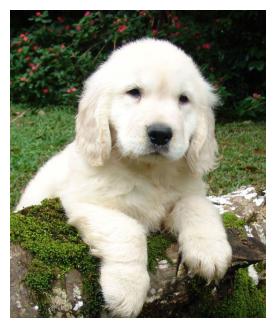

In [21]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Stable puppy image (Wikimedia Commons)
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"

try:
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    response = requests.get(image_url, headers=headers, stream=True)

    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img_array = np.array(img)

        print(f"Image Shape: {img_array.shape}")
        print(f"Data Type: {img_array.dtype}")

        plt.figure(figsize=(4, 4))
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to download. Status Code: {response.status_code}")

except Exception as e:
    print(f"Error: {e}")


Video Loaded: 1280x720
Total Frames: 15691
FPS: 24.0


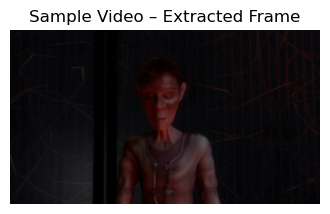

In [22]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

# Reliable Google-hosted video (works with OpenCV)
video_url = "https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/ElephantsDream.mp4"
video_path = "temp_video.mp4"

try:
    print(f"Downloading video from {video_url}...")
    response = requests.get(video_url, timeout=20)

    with open(video_path, 'wb') as f:
        f.write(response.content)

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise RuntimeError("Failed to open video with OpenCV")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f"Video Loaded: {width}x{height}")
    print(f"Total Frames: {frame_count}")
    print(f"FPS: {fps}")

    # Read a frame (same logic as your original working code)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 4)
    ret, frame = cap.read()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title("Sample Video – Extracted Frame")
        plt.show()
    else:
        print("Frame could not be read.")

    cap.release()

except Exception as e:
    print(f"Error processing video: {e}")

finally:
    if os.path.exists(video_path):
        os.remove(video_path)
